In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
gukers=pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [3]:
gukers

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [4]:
gukers_test=pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [5]:
gukers_test

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813
...,...,...,...,...,...,...
1495,11.755466,5.583147,325.069957,0.170644,388400,13.210917
1496,12.220137,4.023177,439.975574,0.163958,195305,13.819358
1497,1.611053,7.864930,65.025106,0.430021,307856,47.369083
1498,7.114131,5.532188,391.178342,0.150117,51590,12.447761


In [8]:

X_train=gukers.drop('class',axis=1)
y_train=gukers['class']
clf_rf = RandomForestClassifier(criterion='entropy',random_state=0)
parametrs = {'n_estimators':  range(10, 50, 10) , 'max_depth': range(1, 12, 2) ,'min_samples_leaf': range(1, 7)
             ,'min_samples_split': range(2, 9, 2)}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3,n_jobs=-1)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [11]:
best_clf=grid_search_cv_clf.best_estimator_
pd.DataFrame(best_clf.predict(gukers_test)).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

<AxesSubplot:>

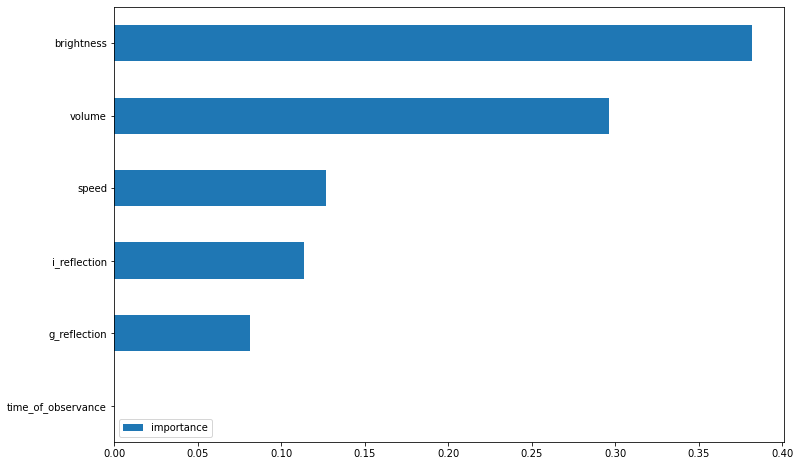

In [12]:
best_clf.feature_importances_
imp = pd.DataFrame(best_clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [13]:
data_regions=pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [17]:
data_regions.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


In [16]:

X_train=data_regions.drop('dangerous',axis=1)
y_train=data_regions['dangerous']
clf_rf = RandomForestClassifier(criterion='entropy',random_state=0)
parametrs = {'n_estimators':  range(10, 50, 10) , 'max_depth': range(1, 12, 2) ,'min_samples_leaf': range(1, 7)
             ,'min_samples_split': range(2, 9, 2)}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3,n_jobs=-1)
grid_search_cv_clf.fit(X_train, y_train)
best_clf=grid_search_cv_clf.best_estimator_
best_clf.feature_importances_
imp = pd.DataFrame(best_clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

KeyboardInterrupt: 